# Introduction

Personal Project by Arvin Assanny

### Deployment URL
https://huggingface.co/spaces/arvinassanny/Deploy-GC3

### Description

We are using dataset from heart-failure table which consist the data of whether a patient will have a heart attack or not , which we retrived using SQL query

```
SELECT *
From `ftds-hacktiv8-project.phase1_ftds_003_hck.heart-failure`
```

After retrieve the filtered dataset, we save it on .csv file then proceed to load it, in this notebook later on.


### Problems
Buatlah model Classification menggunakan Random Forest dan salah satu algoritma boosting untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah Anda dapatkan.

### Assignment Objectives

Graded Challenge 3 ini dibuat guna mengevaluasi konsep Ensemble Learning sebagai berikut:

* Mampu memperoleh data menggunakan BigQuery
* Mampu memahami konsep Classification dengan Ensemble Learning.
* Mampu mengimplementasikan Ensemble Learning untuk membuat prediksi.
* Mampu memahami konsep salah satu algoritma boosting dan mengimplementasikannya dalam kasus Supervised Learning

### Conceptual Problems
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

    Bagging is a method of merging the same type of predictions. The basic idea behind bagging is to train multiple models on different subsets of the training data, and then combine the predictions of these models.
    
    How bagging works? In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these weak models are then trained independently, and depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a more accurate estimate. 

Source: https://www.ibm.com/id-en/topics/bagging#:~:text=Bagging%2C%20also%20known%20as%20bootstrap,be%20chosen%20more%20than%20once.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

    In this case, We use Random Forest and XGBoost Classifier which are both ensemble methods that use decision trees as the base models. On Random Forest, the model works by creating multiple decision trees and combines their predictions. Each tree in the ensemble is created by randomly selecting a subset of the features, and a subset of the training examples to use when creating the tree. The final prediction is made by averaging the predictions of all the trees (for regression) or by taking the mode of the predictions (for classification).

    On XGBoost, the model works by creating multiple decision trees and combines their predictions, but unlike Random Forest, it also uses boosting to weigh each tree's contribution. Boosting is a method that adjusts the weight of the training examples based on the performance of the previous trees.

Source: https://medium.com/geekculture/xgboost-versus-random-forest-898e42870f30#:~:text=One%20of%20the%20most%20important,hyperparameters%20to%20optimize%20the%20model.

## Import Libraries

We will import libraries which we will use on completing this assignment

In [1]:
# Data Loading
import pandas as pd

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

# Data Preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Feature Selection (manual)
import numpy as np

# Model Definition
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

# Model Inference
import joblib

## Data Loading

In [2]:
df = pd.read_csv('h8dsft_P1G3_Arvin_Assanny.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [3]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


We successfully load our data, now we will show ten first row and ten last row of our data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


We have no missing value.

In [5]:
df.shape

(299, 13)

We have 299 rows and 13 columns

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Here we can see columns inside our data

## Exploratory Data Analysis


### General Info

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


We can see overview from our data, we can say that there are some category data with numerical values, we will handle this later.

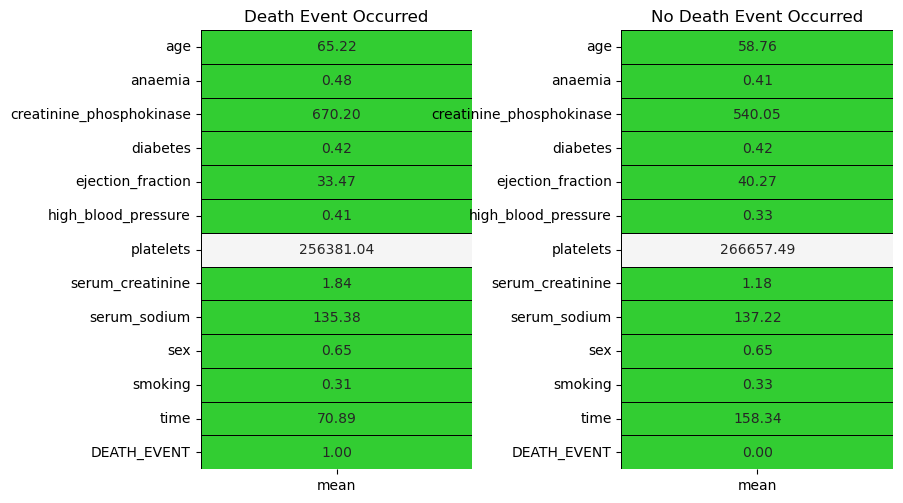

In [8]:
yes = df[df['DEATH_EVENT'] == 1].describe().T
no = df[df['DEATH_EVENT'] == 0].describe().T

colors = ['limegreen','whitesmoke']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (8,4),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -3)

Mean values of all the features for cases of DEATH_EVENT and No DEATH_EVENT

Now we want to group numerical and categorical columns

In [9]:
# Define col
col = list(df.columns)

# Make temp_list
categorical_features = []
numerical_features = []

for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Numerical Features : ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


Here we try to group between numerical and categorical columns, this may help us during EDA.

### Target Label

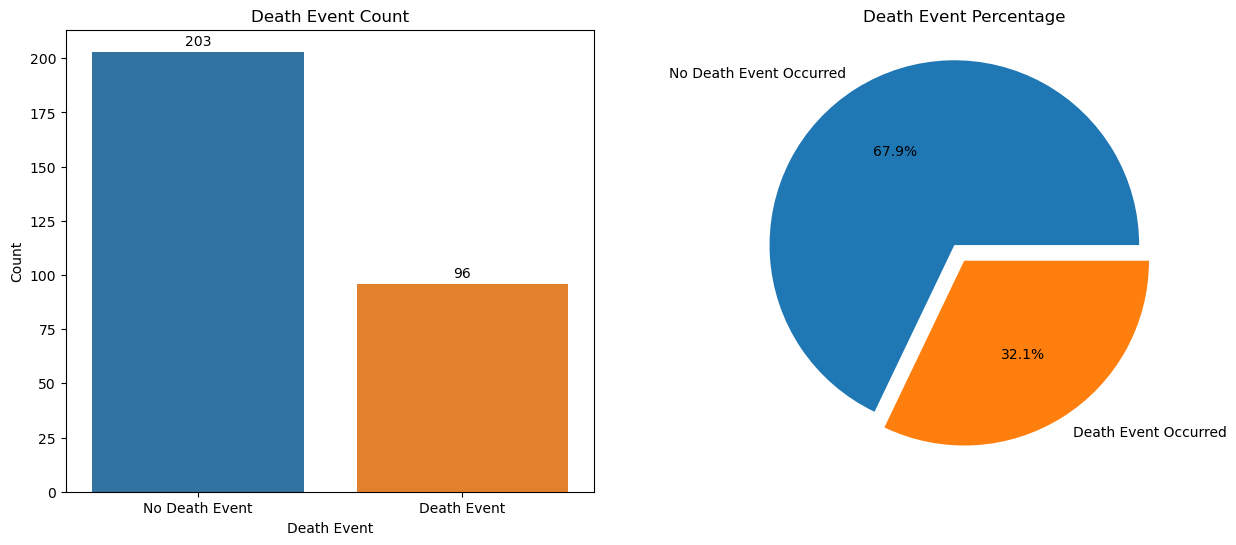

In [10]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='DEATH_EVENT', data=df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Death Event Count')
fig.set_xticklabels(['No Death Event','Death Event'])
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(df['DEATH_EVENT'].value_counts(), labels=['No Death Event Occurred','Death Event Occurred'], autopct='%1.1f%%', explode=[0.1, 0])
plt.title('Death Event Percentage')
plt.show()

The dataset is unbalanced, due to this predictions may be biased towards No Death Event cases.

### Categorical Data Distribution

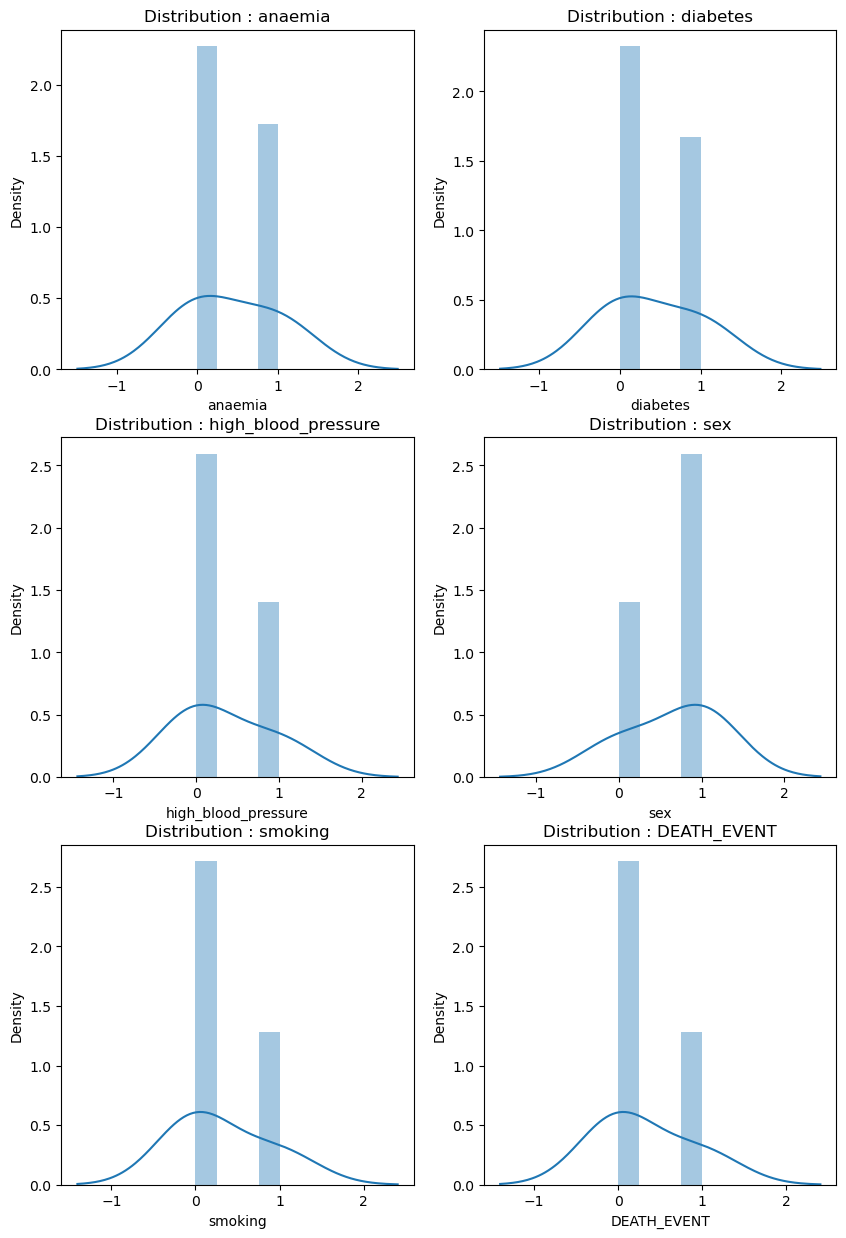

In [11]:
# Categorical Features
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features)):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

Here we can see our categorical features only have 2 labels, so multicollinearity is low

### Numerical Data Distribution

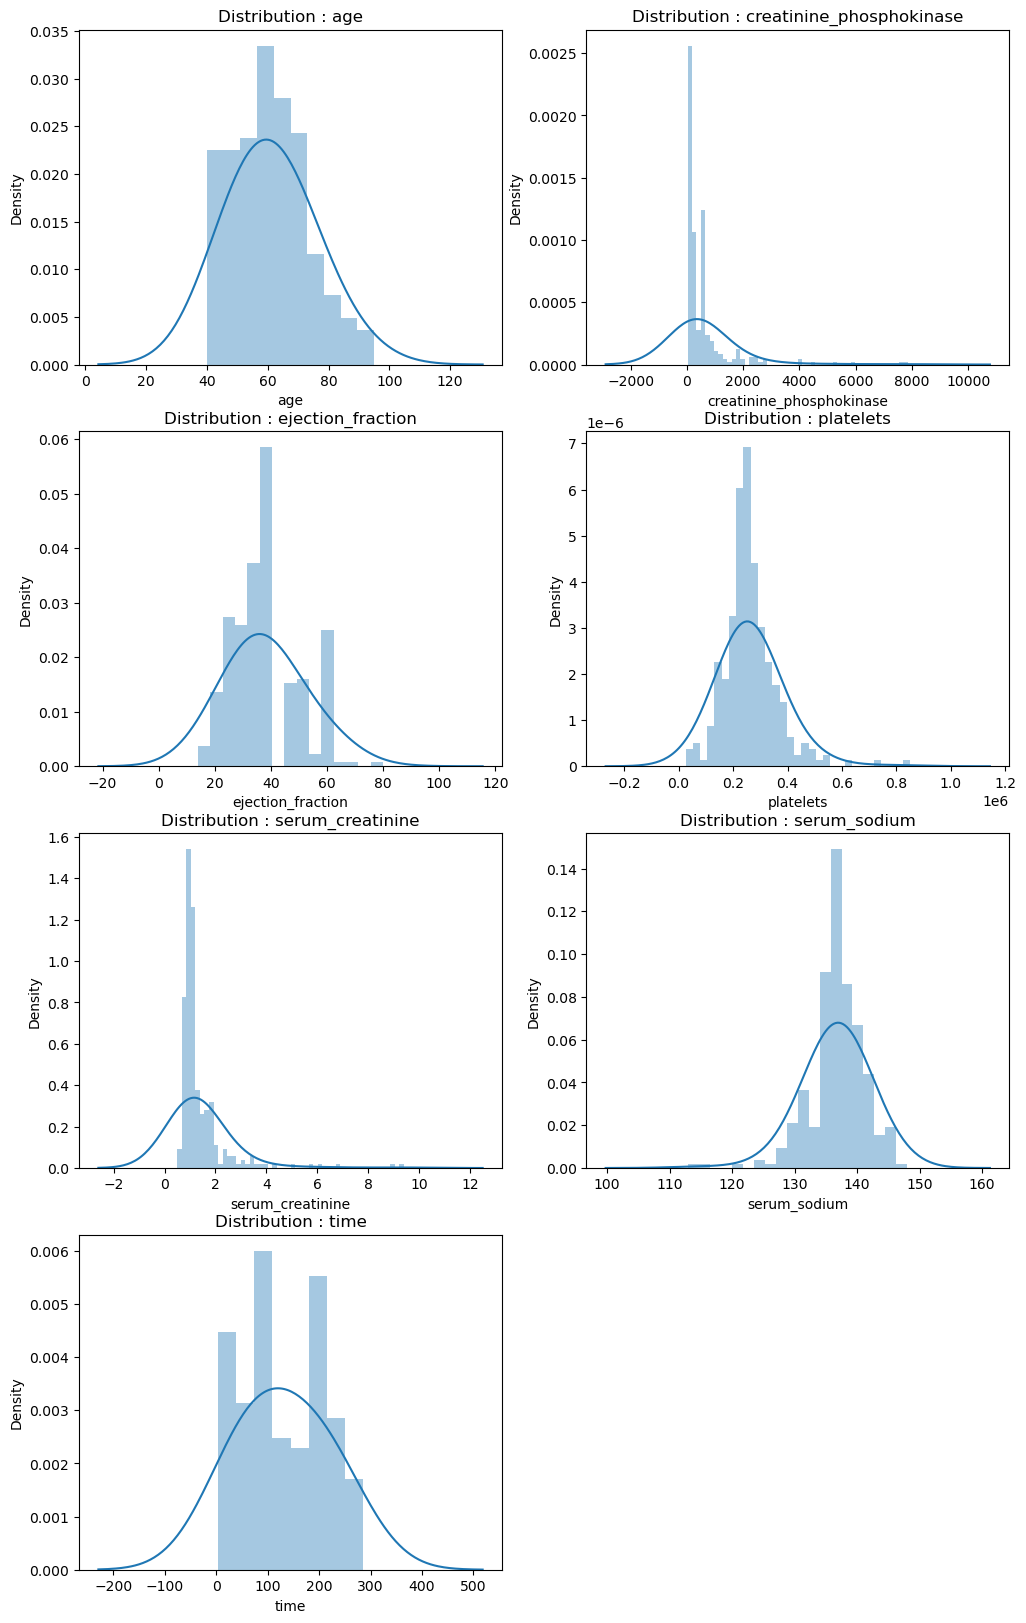

In [12]:
# Numerical Features
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (12,20))
for i in range(len(numerical_features)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(df[numerical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

* Age,Creatinine_Phosphokinase,Ejaction_Fraction and Serum_creatinine have a rightly or positively skewed data distribution.

* Platelets and Serum_Sodium are near about normally distributed.

### Numerical vs Target

In [13]:
df['creatinine_phosphokinase_group'] = [ int(i / 100) for i in df['creatinine_phosphokinase']]
df['platelets_group'] = [ int(i / 10**5) for i in df['platelets']]
df['time_group'] = [ int(i / 5) for i in df['time']]

Because of too many unique data points in the creatinine_phosphokinase, platelets and time features, it is difficult to gain any type of insight. Thus, we will convert these features into categorical features only for visualization purposes.

Here we group it into:

creatinine_phosphokinase => 100

platelets => 10^5

time => 5

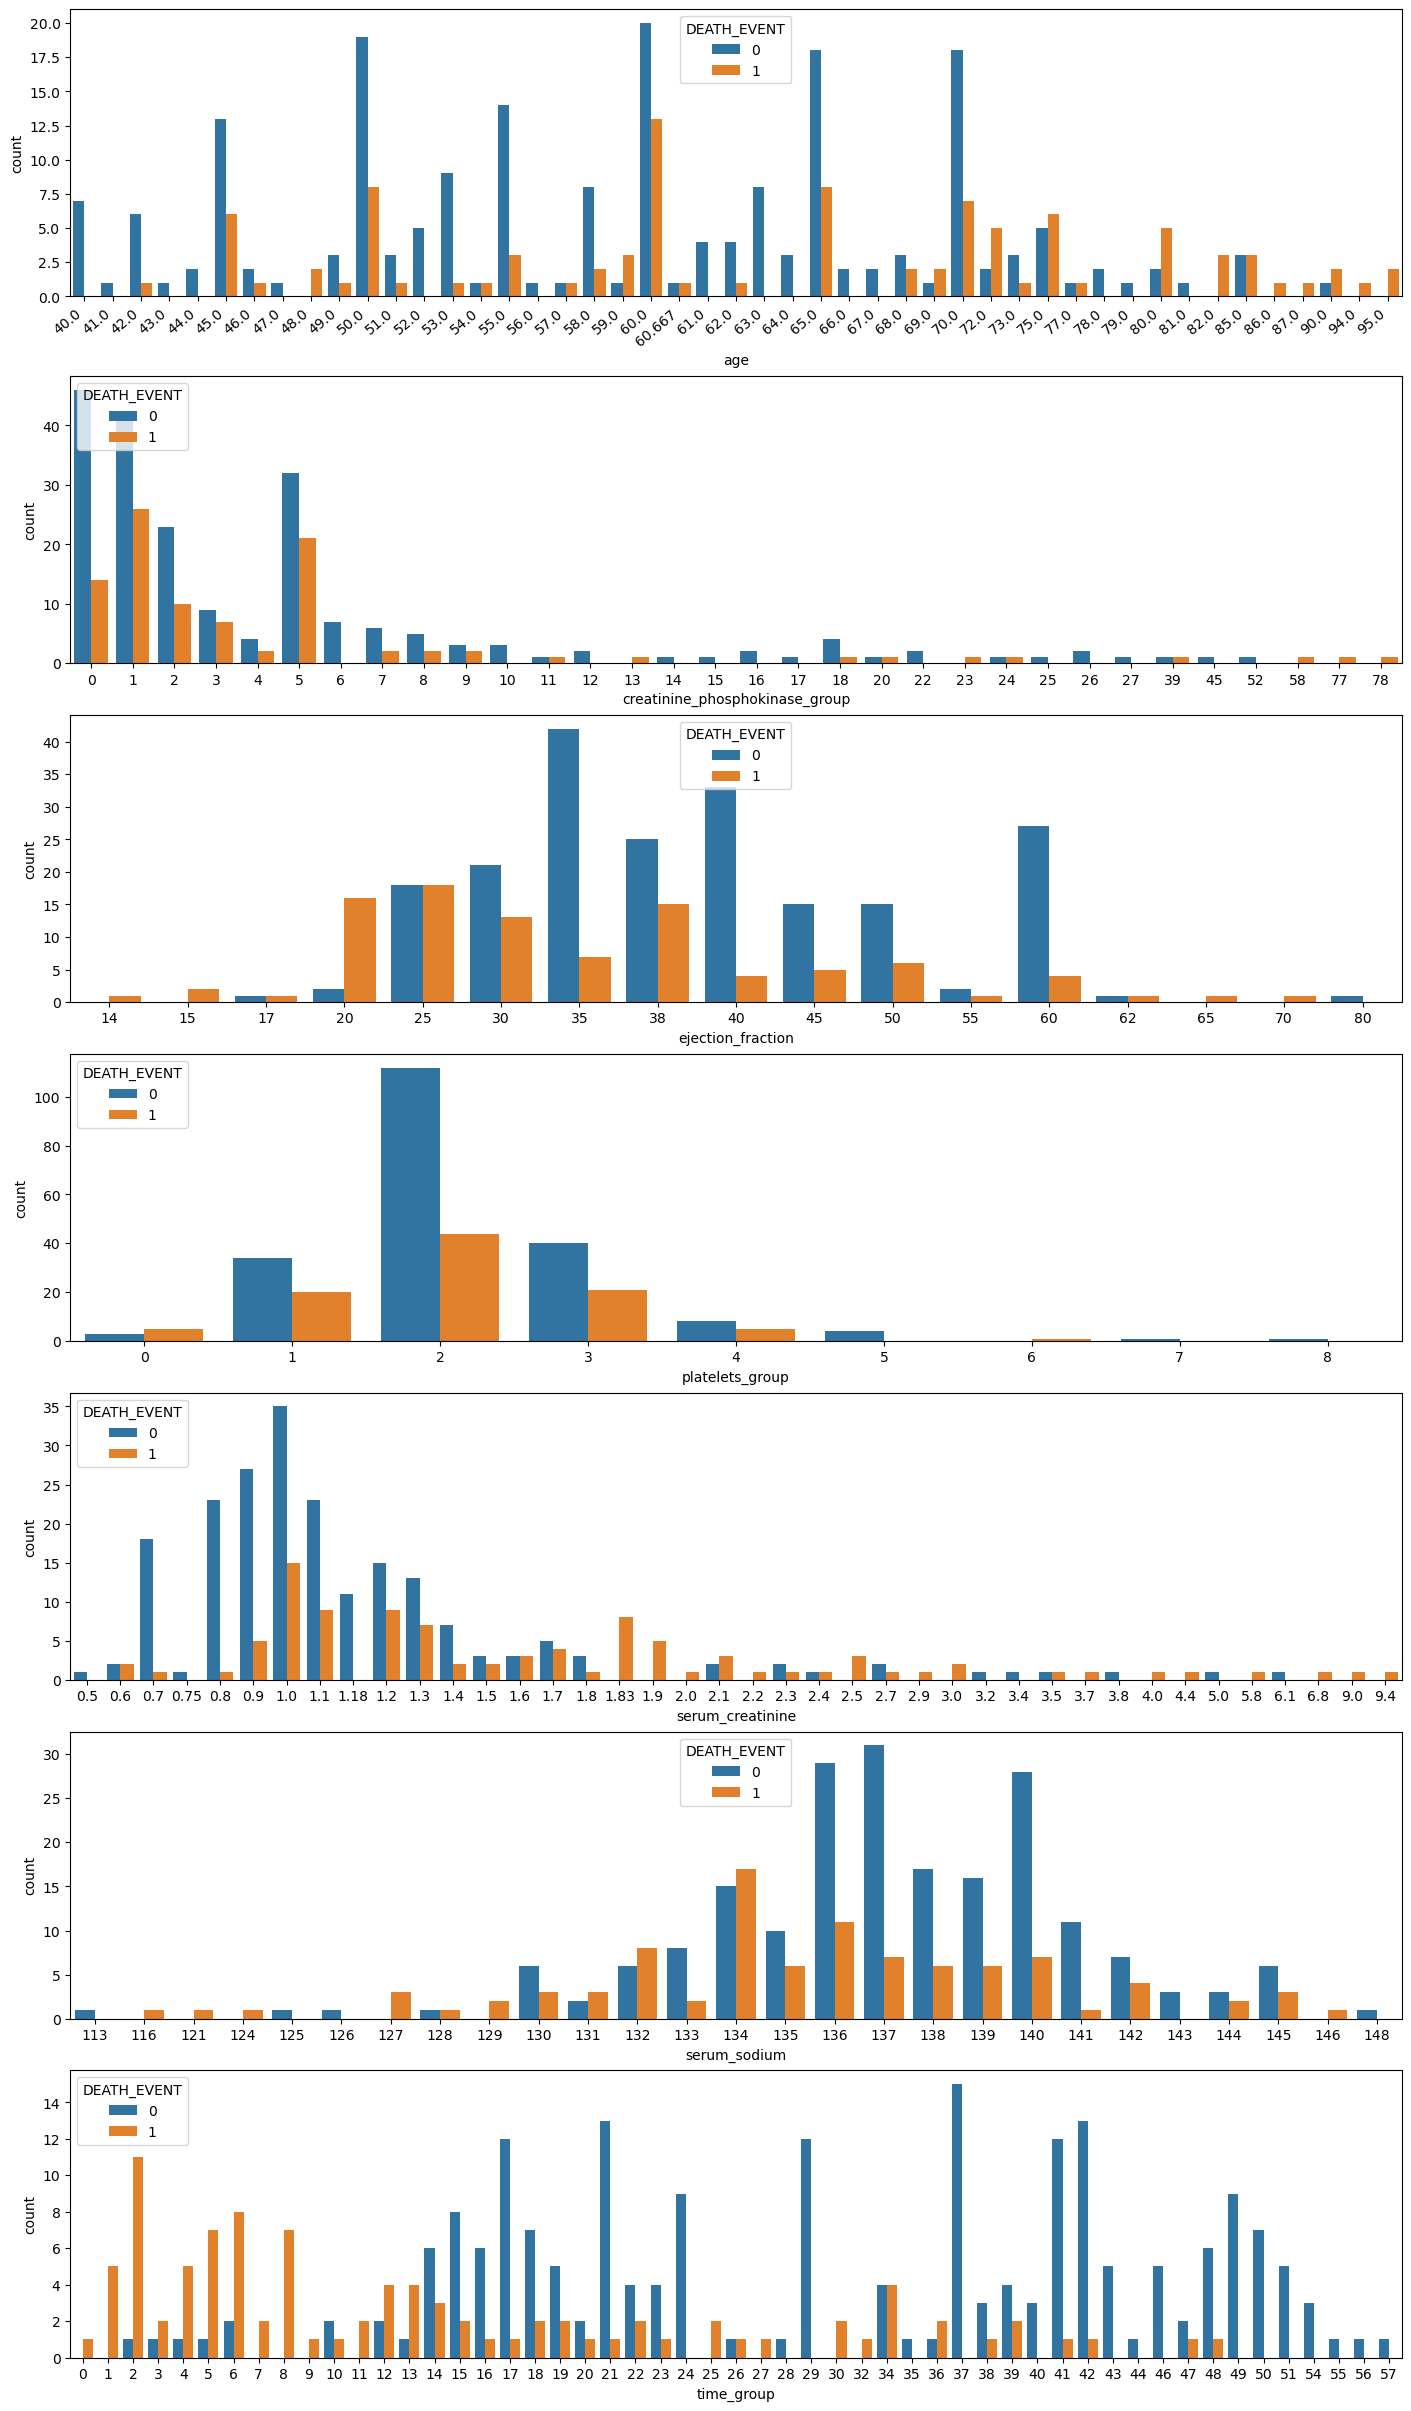

In [14]:
fig, axes = plt.subplots(nrows=7,ncols=1,figsize=(14, 24), constrained_layout=True)

for index, column in enumerate(['age', 'creatinine_phosphokinase_group', 'ejection_fraction', 'platelets_group', 'serum_creatinine', 'serum_sodium', 'time_group']):
    sns.countplot(data=df, x=column, hue="DEATH_EVENT", ax=axes[index])
    if column in ['age']:
        axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=40, ha="right")

del fig, axes, index, column

* Cases of DEATH_EVENT initiate from the age of 45. Some specific peaks of high cases of DEATH_EVENT can be observed at 45, 50, 60, 65, 70, 75 and 80.

* High cases of DEATH_EVENT can be observed for ejaction_fraction values from 20 - 60.

* serum_creatinine values from 0.6 to 3.0 have higher probability to lead to DEATH_EVENT.

* serum_sodium values 127 - 145 indicate towards a DEATH_EVENT due to heart failure.

* DEATH_EVENT cases are on a high for the values between 0(0x100) - 500(5x100) for creatinine_phosphokinase.

* platelets values between 0(0x10^5) - 400,000(4x10^5) are prone to heart failures leading to DEATH_EVENT.

* For the time feature, values from 0(0x5) - 170(34x5) have higher probability to lead to a DEATH_EVENT.

Now we want to drop the columns we made for our visualization

In [15]:
df.drop(['creatinine_phosphokinase_group', 'platelets_group', 'time_group'], axis=1, inplace=True)
df.reset_index(drop=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


### Categorical vs Target

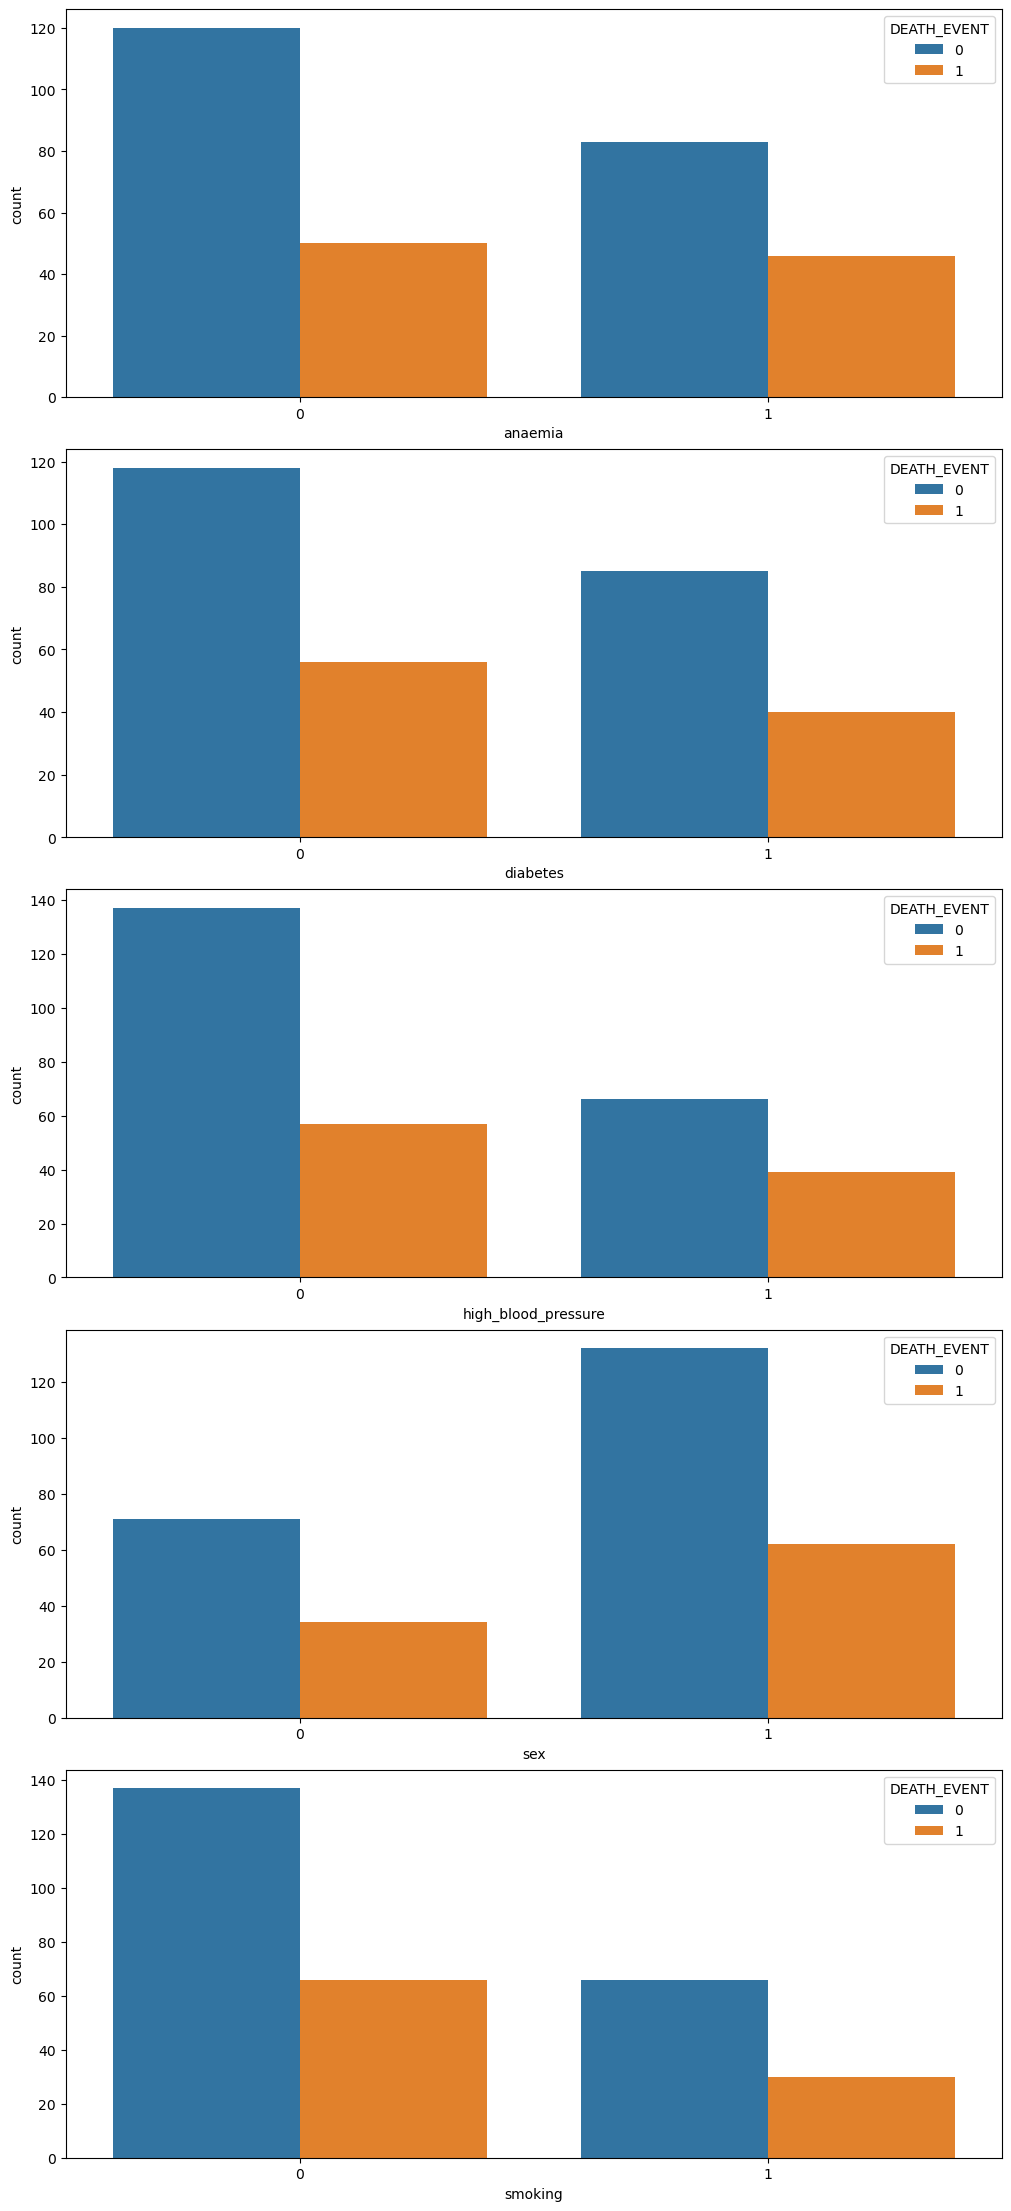

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,22), constrained_layout=True)
for index, column in enumerate(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']):
    sns.countplot(data=df, x=column, hue='DEATH_EVENT', ax=axes[index])
    
del fig, axes, index, column

* Patients with negative cases of anaemia, diabetes, high_blood_pressure and smoking leads to DEATH_EVENT more than the positive cases of these medical conditions.

* There are more cases cases of male population confronting a DEATH_EVENT due to heart failure than female population.

### Check Correlation

In [17]:
# We use phik correlation
phik_corr = df.phik_matrix().DEATH_EVENT
phik_corr.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


DEATH_EVENT                 1.000000
time                        0.772675
ejection_fraction           0.515675
age                         0.356298
serum_creatinine            0.332330
serum_sodium                0.214335
creatinine_phosphokinase    0.101787
high_blood_pressure         0.067031
anaemia                     0.018687
diabetes                    0.000000
platelets                   0.000000
sex                         0.000000
smoking                     0.000000
Name: DEATH_EVENT, dtype: float64

'time','ejection_fraction', 'serum_creatinine', 'serum_sodium' have the high correlation with our target.

## Data Processing

    We do feature selection based on statistics which is phik correlation.

    We don't do feature scaling since Random Forest is a tree-based model and hence does not require feature scaling.

    We don't do feature encoding since we don't have any categorical data in our feature.

### Feature Selection


In [18]:
df_filtered = df[['time','ejection_fraction', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']]
df_filtered.reset_index()
df_filtered.head()

,time,ejection_fraction,serum_creatinine,serum_sodium,DEATH_EVENT
0,65,15,1.3,136,1
1,100,17,2.1,124,1
2,8,20,2.7,116,1
3,43,20,1.4,139,1
4,186,20,1.0,134,0


We make a new variable to store our new filtered dataframe.

### Data Split


In [19]:
feature = ['time','ejection_fraction', 'serum_creatinine', 'serum_sodium']
target = ['DEATH_EVENT']

In [20]:
# Feature and target split
X = df[feature]
y = df[target]

Here we split feature and target columns into new variable, this will help us when doing train_test_split.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=41)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (239, 4)
Test Size  :  (60, 4)


Here we split our data into 4 set

In [22]:
num_cols = X[['time','ejection_fraction', 'serum_creatinine', 'serum_sodium']].columns.tolist()

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')


X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

Number of numerical columns: 4
Numerical columns: ['time', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']


Now we assign numerical column we use in this modeling, because we only use numerical datatype in our feature.

### Handling Outlier

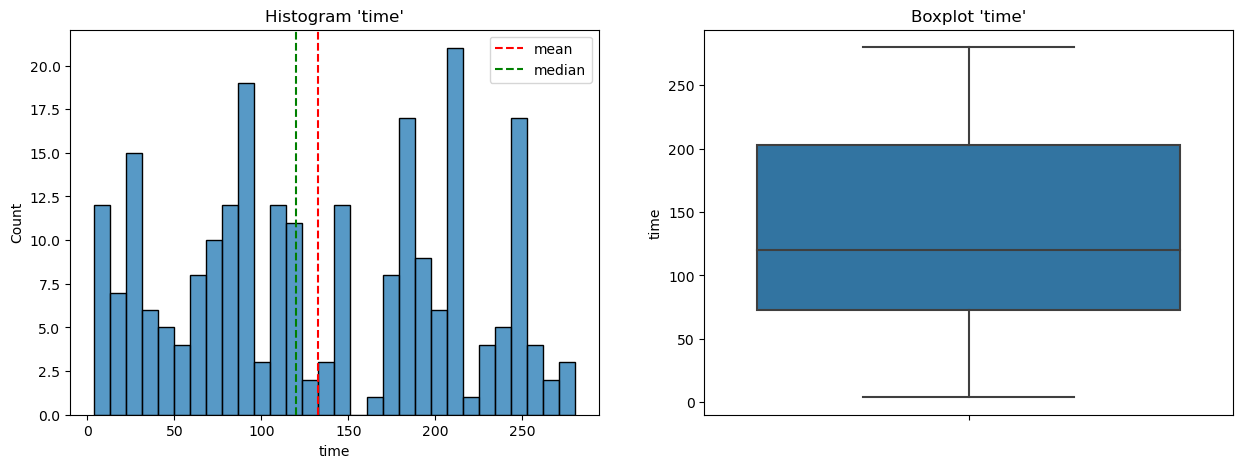

time Kurtosis: -1.2520353358645544
time Skewness: 0.05525807735174532
Columns 'time' Normal Distribution


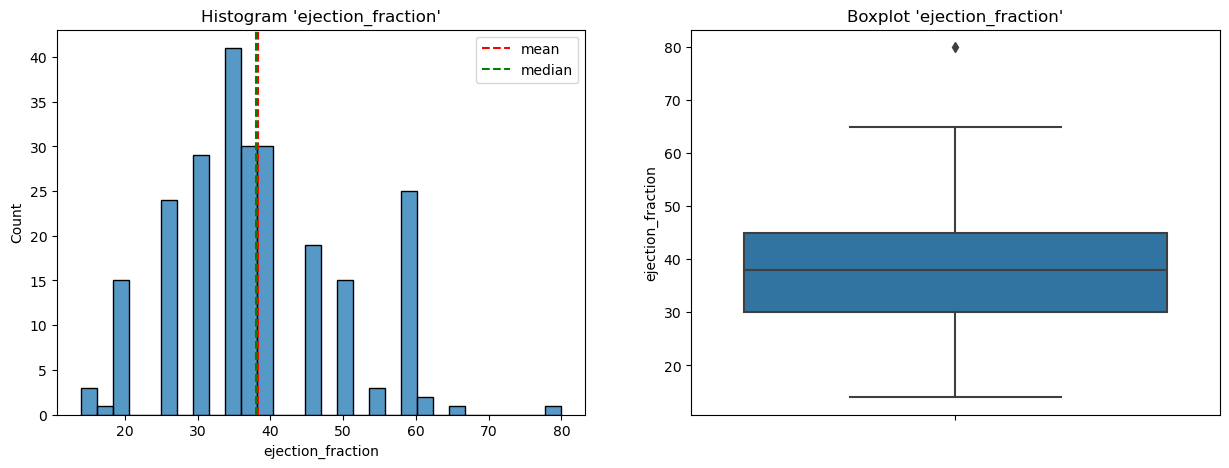

ejection_fraction Kurtosis: 0.09730117368154545
ejection_fraction Skewness: 0.5323380630218638
Columns 'ejection_fraction' Right Moderately Skewed


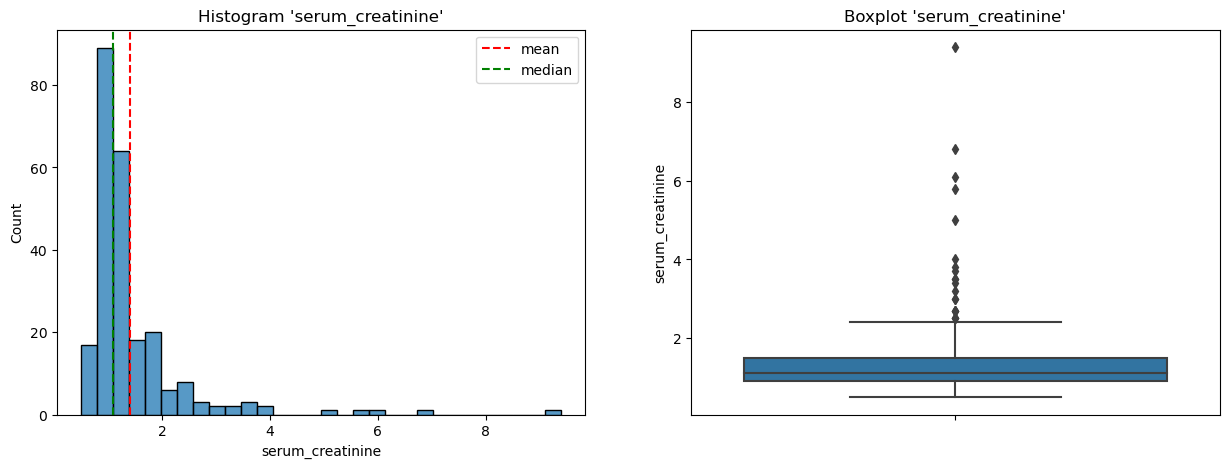

serum_creatinine Kurtosis: 23.256109197060255
serum_creatinine Skewness: 4.1411657031361635
Columns 'serum_creatinine' Right Highly Skewed


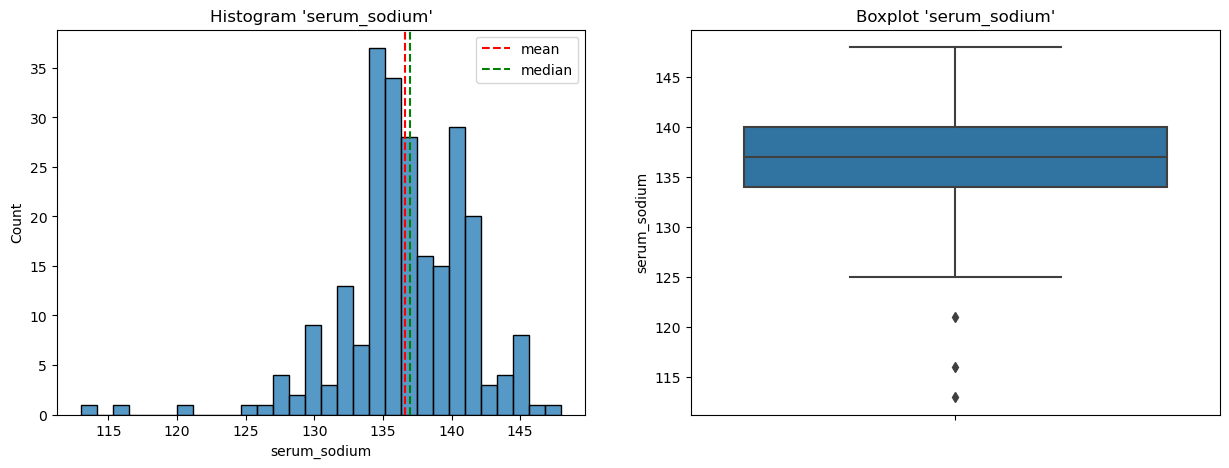

serum_sodium Kurtosis: 4.053860307003305
serum_sodium Skewness: -1.0586014246884674
Columns 'serum_sodium' Left Highly Skewed


In [23]:
def dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(col))

dnum = X_train[num_cols]

for col in dnum.columns:
    dist(X_train, col)

We decided not to handle outliers since the data is already small, and also this may be a natural outlier which represents our patient. Also, tree family model are robust to outlier so it is also taken account for.

### Handling Imbalanced Target

In [24]:
y_train.value_counts()

DEATH_EVENT
0              162
1               77
dtype: int64

Here our target data is imbalanced.

In [25]:
over = SMOTE(random_state=21, sampling_strategy='minority')
X_train, y_train = over.fit_resample(X_train,y_train)
y_train.value_counts()

DEATH_EVENT
0              162
1              162
dtype: int64

* Due to the use of synthetic data, we cannot evaluate the models using accuracy. We have duplicated the data, thus using accuracy would be misleading to evaluate the model.

* We will use the confusion matrix, and using recall score

## Model Definition

In [26]:
# Define RandomForestClassifier 
rf = RandomForestClassifier(random_state=7)
# Define Boosting Algorithm 
xgb = XGBClassifier(random_state=7)
ada = AdaBoostClassifier(random_state=7)

Here we define our model, we also set random state to make sure it doesn't change.

## Random Forest Classifier

### Model Training

In [27]:
# Fitting Random Forest Model with default parameter
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

Here fit our model to learn about our train data.

### Model Evaluation

In this model evaluation we want to focus on recall score, since this is a medical diagnosis we want to minimize false negative. Therefore, we opt to maximize recall score.

In [28]:
# Predict using random forest model
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

Now we predict using our model and evaluate the result.

#### Model Evaluation Train set

In [29]:
target_names = ['No Death Event', 'Death Event']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,rf_pred_train,zero_division=0, target_names = target_names))

======================================== TRAINING ========================================
                precision    recall  f1-score   support

No Death Event       1.00      1.00      1.00       162
   Death Event       1.00      1.00      1.00       162

      accuracy                           1.00       324
     macro avg       1.00      1.00      1.00       324
  weighted avg       1.00      1.00      1.00       324



* Here using classification report we see that our result are perfect score across all metrics, this may cause overfit when we compare our result later with test set.
* Looking at this result, our model when evaluated using train test is giving us 100% recall which means it can predict all the death event right.
* Tree based model are prone to overfitting because the model has learned the noise in the training data, rather than the underlying pattern.

Now we want to look at confusion matrix, which can helps us understand our result easier.

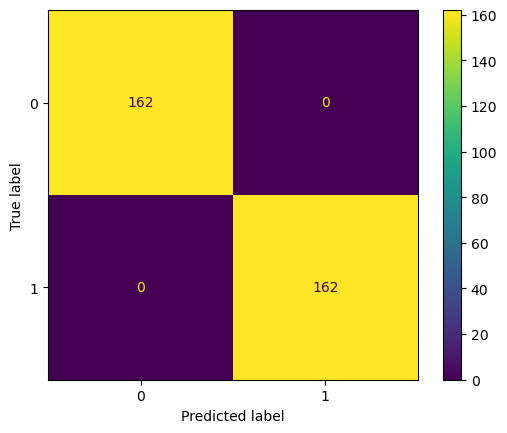

In [30]:
rf_train = confusion_matrix(y_train, rf_pred_train, labels=rf.classes_)
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=rf_train,display_labels=rf.classes_)

disp_rf_train.plot()
plt.show()

Here we can see that our model predict everything right.

Now we want to look at test set

#### Model Evaluation Test Set

In [31]:
target_names = ['No Death Event', 'Death Event']
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,rf_pred_test,zero_division=0, target_names = target_names))

======================================== TEST ========================================
                precision    recall  f1-score   support

No Death Event       0.89      0.78      0.83        41
   Death Event       0.62      0.79      0.70        19

      accuracy                           0.78        60
     macro avg       0.76      0.78      0.76        60
  weighted avg       0.81      0.78      0.79        60



* Here using classification report we see that our result is very different from the train set evaluation, which is more real than, using train set.
* We can say our model is overfiting when compared to train set, where our recall score for death event is much lower than our train score.
* But, from my personal judgement this model is quite good because it can predict almost 80% patient.

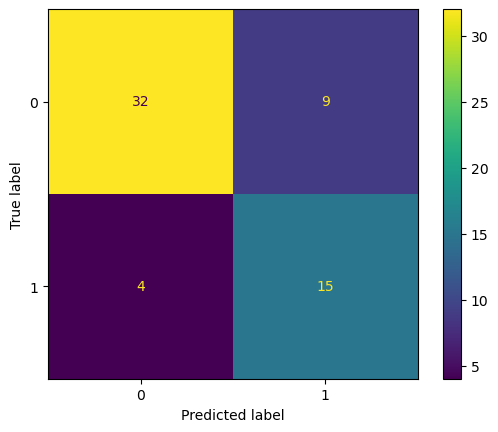

In [32]:
rf_test = confusion_matrix(y_test, rf_pred_test, labels=rf.classes_)
disp_rf_test = ConfusionMatrixDisplay(confusion_matrix=rf_test,display_labels=rf.classes_)

disp_rf_test.plot()
plt.show()

Here we can see more clearly, our model can predict quite good. Out of 19 patient, we can predict 15 patient right.

### Hyperparamter Tuning
Now we want to make our model much better, such as reduce overfitting and perhaps increase recall score.

In [33]:
hyperparameters = {
              'n_estimators': [50, 100],
              'max_depth': [None, 5],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 5],
              'class_weight': [None],
              'criterion':['entropy','gini'],
              'ccp_alpha': [0.0, 0.01]
              }

rf_grid = GridSearchCV(rf, hyperparameters, cv = 5, scoring='recall', return_train_score=True)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
             param_grid={'ccp_alpha': [0.0, 0.01], 'class_weight': [None],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 5], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='recall')

We use gridsearch CV to find the best parameter for our model.

In [34]:
rf_grid.best_params_

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [35]:
rf_grid.best_score_

0.9195075757575758

Here we can obtain 0,91 recall score

In [36]:
rf_df = pd.DataFrame(rf_grid.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
rf_df.sort_values(['mean_test_score', 'mean_train_score'], ascending=False).head(3)

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
1,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.919508,0.057405,1.000000,0.000000
33,"{'ccp_alpha': 0.01, 'class_weight': None, 'cri...",0.913447,0.049665,0.993822,0.003089
9,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.913447,0.041618,0.952153,0.014969


Here are some best parameter.

In [37]:
rf_grid.best_estimator_

RandomForestClassifier(criterion='entropy', random_state=7)

In [38]:
rf_tuned = rf_grid.best_estimator_

Now we will assign the best paramter into our tuned model.

### Model Evaluation After Tuning

In [39]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

In [40]:
rf_tuned_pred_train = rf_tuned.predict(X_train)
rf_tuned_pred_test = rf_tuned.predict(X_test)

Now we want to see differences after tuning our model

In [41]:
print('Before Tuning : ')
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,rf_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,rf_pred_test,zero_division=0, target_names = target_names))
print('After Tuning : ')
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,rf_tuned_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,rf_tuned_pred_test,zero_division=0, target_names = target_names))

Before Tuning : 
======================================== TRAINING ========================================
              precision    recall  f1-score   support

 Not Default       1.00      1.00      1.00       162
     Default       1.00      1.00      1.00       162

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

======================================== TEST ========================================
              precision    recall  f1-score   support

 Not Default       0.89      0.78      0.83        41
     Default       0.62      0.79      0.70        19

    accuracy                           0.78        60
   macro avg       0.76      0.78      0.76        60
weighted avg       0.81      0.78      0.79        60

After Tuning : 
======================================== TRAINING ========================================
              precision    recall  f1-score 

* From this report we can see that our model still overfitting, and the recall score is not improved.
* But we can see that the tuned model have a more consistent score, so we can say this tuning is slightly better than our base model.

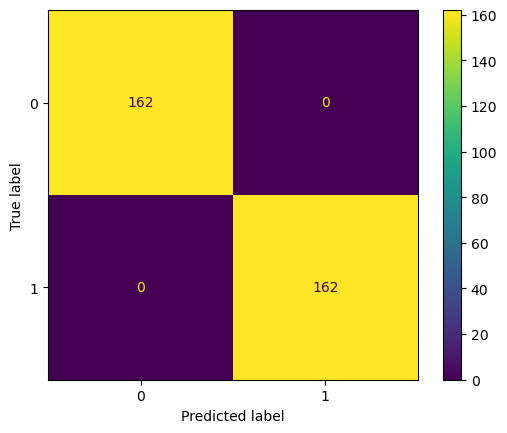

In [42]:
rf_tuned_train = confusion_matrix(y_train, rf_tuned_pred_train, labels=rf.classes_)
disp_rf_tuned_train = ConfusionMatrixDisplay(confusion_matrix=rf_tuned_train,display_labels=rf.classes_)

disp_rf_tuned_train.plot()
plt.show()

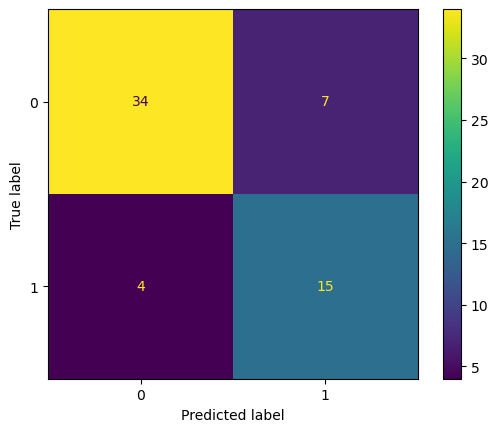

In [43]:
rf_tuned_test = confusion_matrix(y_test, rf_tuned_pred_test, labels=rf.classes_)
disp_rf_tuned_test = ConfusionMatrixDisplay(confusion_matrix=rf_tuned_test,display_labels=rf.classes_)

disp_rf_tuned_test.plot()
plt.show()

The result from confussing matrix are the same, as we can see previously from our reports.

## Boosting Algorithm Cross Validation

Now we want to utilize boosting classifier models, but we want to do cross validation first to find the best boosting model.

In [44]:
# Define Skfold using StratifiedKFold
skfold=StratifiedKFold(n_splits=5, random_state=7, shuffle=True)

# checking cross validation score
cv_xgb_model = cross_val_score(xgb, X_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_xgb_model,cv_ada_model],['xgb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

xgb_model
recall - All - Cross Validation  :  [1.         0.875      0.87878788 0.78787879 0.875     ]
recall - Mean - Cross Validation :  0.8833333333333334
recall - Std - Cross Validation  :  0.06764943666426008
recall - Range of Test-Set       :  0.8156838966690734 - 0.9509827699975935
--------------------------------------------------
ada_model
recall - All - Cross Validation  :  [0.9375     0.75       0.90909091 0.90909091 0.875     ]
recall - Mean - Cross Validation :  0.8761363636363637
recall - Std - Cross Validation  :  0.06610472532840449
recall - Range of Test-Set       :  0.8100316383079592 - 0.9422410889647682
--------------------------------------------------
best model: xgb_model
cross-val mean: 0.8833333333333334


After doing cross validation, we can see that XGBoost model is better than ada AdaBoost model. So, we will go ahead use this model.

### Model Training

In [45]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=7, ...)

Train our XGBoost with base model.

### Model Evaluation

In [46]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)

In [47]:
target_names = ['No Death Event', 'Death Event']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,xgb_pred_train,zero_division=0, target_names = target_names))

======================================== TRAINING ========================================
                precision    recall  f1-score   support

No Death Event       1.00      1.00      1.00       162
   Death Event       1.00      1.00      1.00       162

      accuracy                           1.00       324
     macro avg       1.00      1.00      1.00       324
  weighted avg       1.00      1.00      1.00       324



We see that the result is too good to be true when evaluate using train set, this may also sign of overfitting.

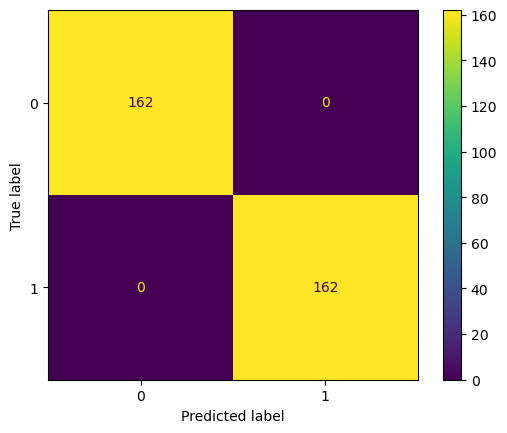

In [48]:
xgb_train = confusion_matrix(y_train, xgb_pred_train, labels=rf.classes_)
disp_xgb_train = ConfusionMatrixDisplay(confusion_matrix=xgb_train,display_labels=xgb.classes_)

disp_xgb_train.plot()
plt.show()

This model may predict everything true.

Now we will look at our test evaluation

In [49]:
target_names = ['No Death Event', 'Death Event']
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,xgb_pred_test,zero_division=0, target_names = target_names))

======================================== TEST ========================================
                precision    recall  f1-score   support

No Death Event       0.90      0.85      0.88        41
   Death Event       0.71      0.79      0.75        19

      accuracy                           0.83        60
     macro avg       0.81      0.82      0.81        60
  weighted avg       0.84      0.83      0.84        60



* This result shows us that our model is indeed overfitting, similar to our random forest model.
* But this model give us a decent recall score, with almost 80% prediction may end up true.

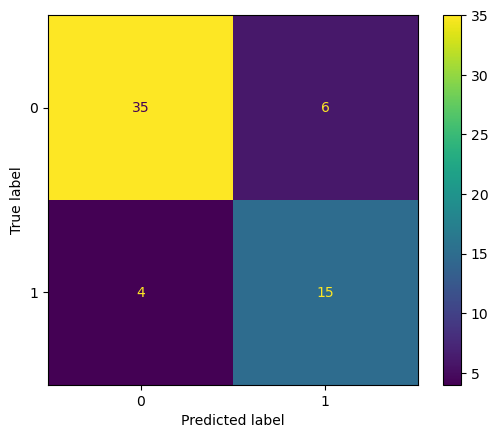

In [50]:
xgb_test = confusion_matrix(y_test, xgb_pred_test, labels=rf.classes_)
disp_xgb_test = ConfusionMatrixDisplay(confusion_matrix=xgb_test,display_labels=xgb.classes_)

disp_xgb_test.plot()
plt.show()

* Similar to our RandomForest model, the result is quite the same.
* With 15 out of 19 prediction is accurate.

### Hyperparameter Tuning

Now we want to tune our second model to try get better result.

In [51]:
param_grid = {'max_depth': [3, 5, 7],
              'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.01, 0.05],
              'subsample': [0.8, 1],
              }

xgb_grid = GridSearchCV(xgb, param_grid, cv = 5, scoring='recall', return_train_score=True)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

We also use GridSearchCV with some parameters used in XGBoost Classifier.

In [52]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}

In [53]:
xgb_grid.best_score_

0.9316287878787879

Here we might get 0.93 recall score.

In [54]:
xgb_df = pd.DataFrame(xgb_grid.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
xgb_df.sort_values(['mean_test_score', 'mean_train_score'], ascending=False).head(3)

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
11,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.931629,0.063779,1.000000,0.000000
15,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.925568,0.070013,0.996923,0.003768
53,"{'learning_rate': 0.05, 'max_depth': 7, 'n_est...",0.925568,0.070013,0.995373,0.003778


We also see top parameters.

In [55]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=7, ...)

In [56]:
xgb_tuned = xgb_grid.best_estimator_

Now we assign new tuned model into a new variable to differentiate from our base model, now we will also do evaluation of our model.

### Model Evaluation After Tuning

In [57]:
xgb_tuned.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=7, ...)

Now we will train our tuned model.

In [58]:
xgb_tuned_pred_train = xgb_tuned.predict(X_train)
xgb_tuned_pred_test = xgb_tuned.predict(X_test)

We predict using our model, then make a classification report and confussion matrix

In [59]:
print('Before Tuning : ')
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,xgb_tuned_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,xgb_tuned_pred_test,zero_division=0, target_names = target_names))
print('After Tuning : ')
target_names = ['Not Default', 'Default']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train,xgb_tuned_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,xgb_tuned_pred_test,zero_division=0, target_names = target_names))

Before Tuning : 
======================================== TRAINING ========================================
              precision    recall  f1-score   support

 Not Default       1.00      0.99      1.00       162
     Default       0.99      1.00      1.00       162

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

======================================== TEST ========================================
              precision    recall  f1-score   support

 Not Default       0.92      0.85      0.89        41
     Default       0.73      0.84      0.78        19

    accuracy                           0.85        60
   macro avg       0.82      0.85      0.83        60
weighted avg       0.86      0.85      0.85        60

After Tuning : 
======================================== TRAINING ========================================
              precision    recall  f1-score 

* From this report, our test with tuned model evaluation gives us 0.84 score which is an increase from 0.79 score from our base model.
* This tuned model still overfitting when comparing to train & test set evaluation, but this model is better because an increase of 5% on recall.

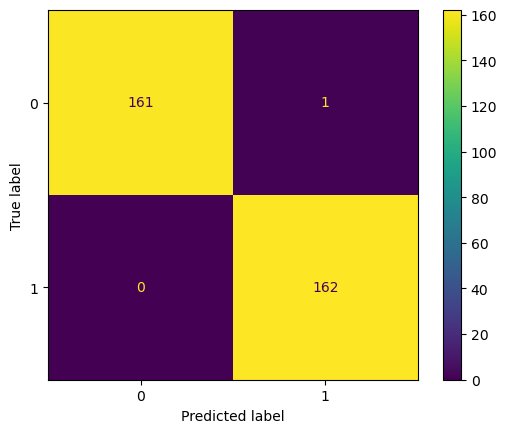

In [60]:
xgb_tuned_train = confusion_matrix(y_train, xgb_tuned_pred_train, labels=rf.classes_)
disp_xgb_tuned_train = ConfusionMatrixDisplay(confusion_matrix=xgb_tuned_train,display_labels=xgb.classes_)

disp_xgb_tuned_train.plot()
plt.show()

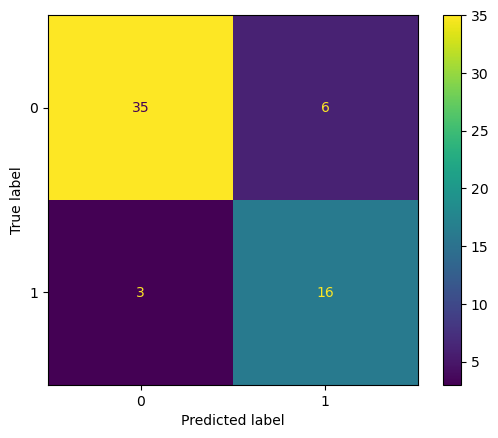

In [61]:
xgb_tuned_test = confusion_matrix(y_test, xgb_tuned_pred_test, labels=rf.classes_)
disp_xgb_tuned_test = ConfusionMatrixDisplay(confusion_matrix=xgb_tuned_test,display_labels=xgb.classes_)

disp_xgb_tuned_test.plot()
plt.show()

* Here we can see 16 out 19 patient, that our model predict their condition right.
* We have an increase of 1 patient from base model, so this model is much better.

## Overall Evaluation
Now we want to see our model head to head, using the recall score as our metric using the tuned version which is we agree is the best model from each models.

In [62]:
# Make Dataframe of our model result.
all_reports = {}
score_reports = {
    'train - recall' : recall_score(y_train, rf_tuned_pred_train),
    'test - recall' : recall_score(y_test, rf_tuned_pred_test),
}
all_reports['RF Tuned'] = score_reports

In [63]:
score_reports = {
    'train - recall' : recall_score(y_train, xgb_tuned_pred_train),
    'test - recall' : recall_score(y_test, xgb_tuned_pred_test),
}
all_reports['XGB Tuned'] = score_reports

pd.DataFrame(all_reports).sort_index()

,RF Tuned,XGB Tuned
test - recall,0.789474,0.842105
train - recall,1.000000,1.000000


This result shows that:
* Both model are overfitting, but both model also can predict quite well. Because have an ability to predict true, from 79% until 85%.
* This result is understandable, because XGBoost is generally considered to be more powerful and accurate than Random Forest. XGBoost uses gradient boosting to improve the performance of decision trees, while Random Forest uses random sampling of the data to construct multiple decision trees and then combines their predictions. 
* But XGBoost may be more computationally expensive.

We are using GridSearch to get the hyperparameter to increase our model, Here the parameter we use:
* RandomForest :
    {'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

* XGBoost: 
    {'learning_rate': 0.1, 
    'max_depth': 5, 
    'n_estimators': 200, 
    'subsample': 1}
    

## Conclusion
* 'time','ejection_fraction', 'serum_creatinine', 'serum_sodium' have the high correlation with our target. Therefore we use this columns as our feature for modeling.
* The dataset is unbalanced, due to this predictions may be biased towards No Death Event cases. Because of this we opt to handle this condition using SMOTE to oversampling our target variable on train set.
* We decided not to handle outliers since the data is already small, and also this may be a natural outlier which represents our patient. Also, tree family model are robust to outlier so it is also taken account for.
* We also dont do feature scaling and encoding because we see no need to do so, since we don't have categorical datatype on our feature. Also, scaling is not needed on tree based model.
* Here we use RandomForest and XGBoost to classify our problems.
* We can say that XGBoost with hyperparameter tuning is much better than other models we use, because it scored a high recall score with 0.84. This means that almost 85% prediction might come true.
* In this model evaluation we want to focus on recall score, since this is a medical diagnosis we want to minimize false negative. Therefore, we opt to maximize recall score.
* XGBoost uses gradient boosting to improve the performance of decision trees, while Random Forest uses random sampling of the data to construct multiple decision trees and then combines their predictions. So it is make more sense if the result is much better.
* Overall, our model may need some adjustment to reduce its overfitting where both models suffer the same condition. We may need to do sume pruning, since tree based model is prone to overfitting and pruning may become the answer.
* Random forests & XGBoost are prone to overfitting because they can easily memorize the training data by creating deep and complex trees. As the number of layers in the tree increase, the model becomes more complex and is able to fit the training data almost perfectly, but performs poorly on unseen data. 
* But, from my asumption this model is quite good, especially the tuned XBGBoost model which have a fair recall score and also the result is much consistent than the base model.

From EDA, we can say that:
* Our categorical features only have 2 labels, so multicollinearity is low.
* Age,Creatinine_Phosphokinase,Ejaction_Fraction and Serum_creatinine have a rightly or positively skewed data distribution.
* Platelets and Serum_Sodium are near about normally distributed.
* High cases of DEATH_EVENT can be observed for ejaction_fraction values from 20 - 60.
* serum_sodium values 127 - 145 indicate towards a DEATH_EVENT due to heart failure.
* Cases of DEATH_EVENT initiate from the age of 45. Some specific peaks of high cases of DEATH_EVENT can be observed at 45, 50, 60, 65, 70, 75 and 80.
* Patients with negative cases of anaemia, diabetes, high_blood_pressure and smoking leads to DEATH_EVENT more than the positive cases of these medical conditions.
* There are more cases cases of male population confronting a DEATH_EVENT due to heart failure than female population.

## Model Saving

Now we want to save our model that we build and try to test it on a new data, to see its perfonmance.

In [64]:
with open('model_xgb_tuned.pkl', 'wb') as file_1:
  joblib.dump(xgb_tuned, file_1)